In [5]:
import pandas as pd
import numpy as np
df = pd.read_csv('data_penjualan.csv', sep=';')
print(df)

         Tanggal      Jenis Produk  Jumlah Order  Harga    Total
0     05/08/2022        Foodpak260          1000   1800  1800000
1     05/08/2022   FoodpakMatte245          1000   1900  1900000
2     05/08/2022  CraftLaminasi290          5000    750  3750000
3     05/08/2022  CraftLaminasi290          1000   1200  1200000
4     07/08/2022        Dupleks310          1000   1550  1550000
...          ...               ...           ...    ...      ...
1071  14/11/2023          Ivory230          1000    900   900000
1072  15/11/2023  CraftLaminasi290          2000    800  1600000
1073  15/11/2023  CraftLaminasi290          1500    875  1312500
1074  15/11/2023      FoodpakMatte          1000   2200  2200000
1075  15/11/2023       GreaseProof          1000    300   300000

[1076 rows x 5 columns]


In [6]:
df['Harga'].mean()

np.float64(1703.7815985130112)

In [7]:
df['Harga'].mode()

0    1700
Name: Harga, dtype: int64

In [8]:
df['Harga'].median()

np.float64(1500.0)

In [9]:
# Menghitung kuartil pertama (Q1)
q1 = df['Harga'].quantile(0.25)
print("Q1 : " , q1)
# menghitung kuartil ketiga (Q3)
q3 = df['Harga'].quantile(0.75)
print("Q3 : ", q3)
iqr = q3 - q1
print("IQR : ", iqr)

Q1 :  950.0
Q3 :  1850.0
IQR :  900.0


<Axes: >

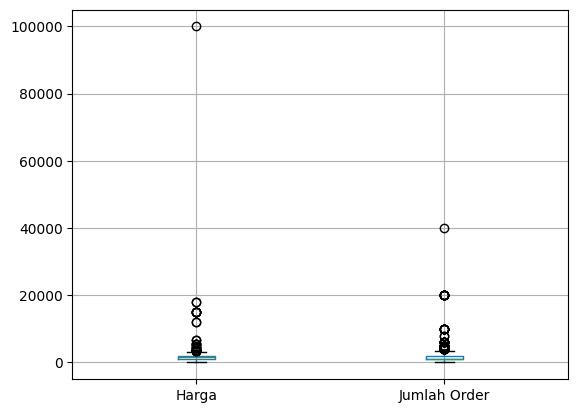

In [10]:
df.boxplot(column=['Harga','Jumlah Order'])

In [51]:
outlier_data = {
    'Jenis Produk': ["Foodpak260", "FoodpakMatte245", "CraftLaminasi290", "Dupleks310", "Ivory230", "FoodpakMatte", "GreaseProof", np.nan, np.nan, np.nan],
    'Jumlah Order': [1000, 5000, 2000, 1500, np.nan, np.nan, np.nan, np.nan, np.nan, np.nan], 
    'Harga': [1800, 1900, 750, 1200, 1550, 900, 800, 875, 2200, 300],
    'Total': [1800000, 1900000, 3750000, 1200000, 1550000, 900000, 1600000, 1312500, 2200000, 300000]
}

outlier_df = pd.DataFrame(outlier_data)

df = pd.concat([df, outlier_df], ignore_index=True)
df

,Jumlah Order,Total,Jenis Produk,Harga
0,1000.0,1800000,NaN,NaN
1,1000.0,1900000,NaN,NaN
2,5000.0,3750000,NaN,NaN
3,1000.0,1200000,NaN,NaN
4,1000.0,1550000,NaN,NaN
5,1000.0,1000000,NaN,NaN
6,2000.0,3000000,NaN,NaN
7,500.0,1200000,NaN,NaN
8,1000.0,1800000,Foodpak260,1800.0
9,5000.0,1900000,FoodpakMatte245,1900.0


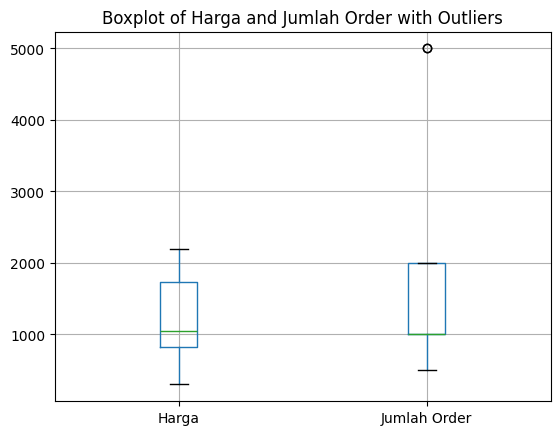

In [54]:
import  matplotlib.pyplot as plt
df.boxplot(column=['Harga', 'Jumlah Order'])
plt.title('Boxplot of Harga and Jumlah Order with Outliers')
plt.show()

In [55]:
# HMenghitung kuartil pertamaa(Q1)
q1 = df['Harga'].quantile(0.25)

# Menghitung kuartil ketiga (Q3)
q3 = df['Harga'].quantile(0.75)
iqr = q3 - q1

# Menghitung batas bawah (Lower Bound) dan batas atas (upper Bound) untuk outlier
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# outlier dalam DataFrame
outliers = df[(df['Harga'] < lower_bound) | (df['Harga'] > upper_bound)]

print("Outlier Harga:")
print(outliers)

Outlier Harga:
Empty DataFrame
Columns: [Jumlah Order, Total, Jenis Produk, Harga]
Index: []


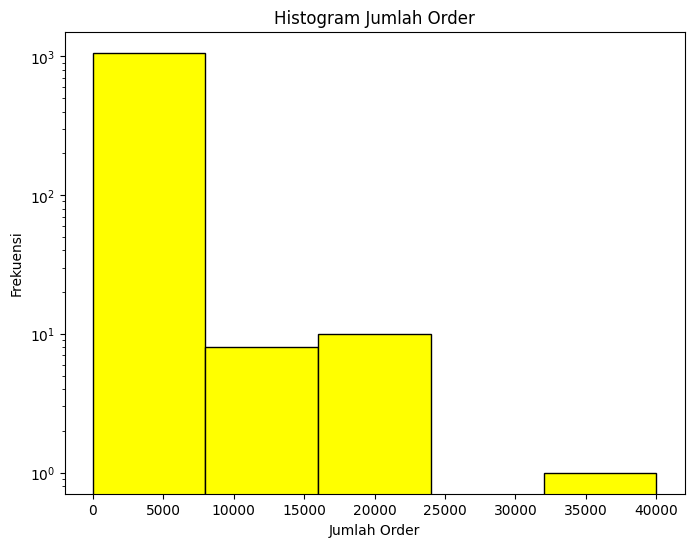

In [33]:

data_order = df["Jumlah Order"]

plt.figure(figsize=(8, 6))
plt.hist(data_order, bins=5, color='yellow', edgecolor='black', log=True)

plt.title('Histogram Jumlah Order')
plt.xlabel('Jumlah Order')
plt.ylabel('Frekuensi')

plt.show()


In [34]:
# Mengidentifikasi baris outlier berdasarkan ciri-ciri yang unik

outliers_condition = ((df['Harga'] > upper_bound) | (df['Harga'] < lower_bound)) | (df['Jumlah Order'] < 30) | (df['Jumlah Order'] > 200)

# Drop baris yang memenuhi kondisi di atas (outliers)
df_cleaned = df[~outliers_condition]  # Tanda ~ untuk negasi (tidak termasuk kondisi outlier)

# Menampilkan data setelah penghapusan outliers
print(df_cleaned.tail())

     Tanggal  Jenis Produk  Jumlah Order  Harga    Total
1081     NaN  FoodpakMatte           NaN    900   900000
1082     NaN   GreaseProof           NaN    800  1600000
1083     NaN           NaN           NaN    875  1312500
1084     NaN           NaN           NaN   2200  2200000
1085     NaN           NaN           NaN    300   300000


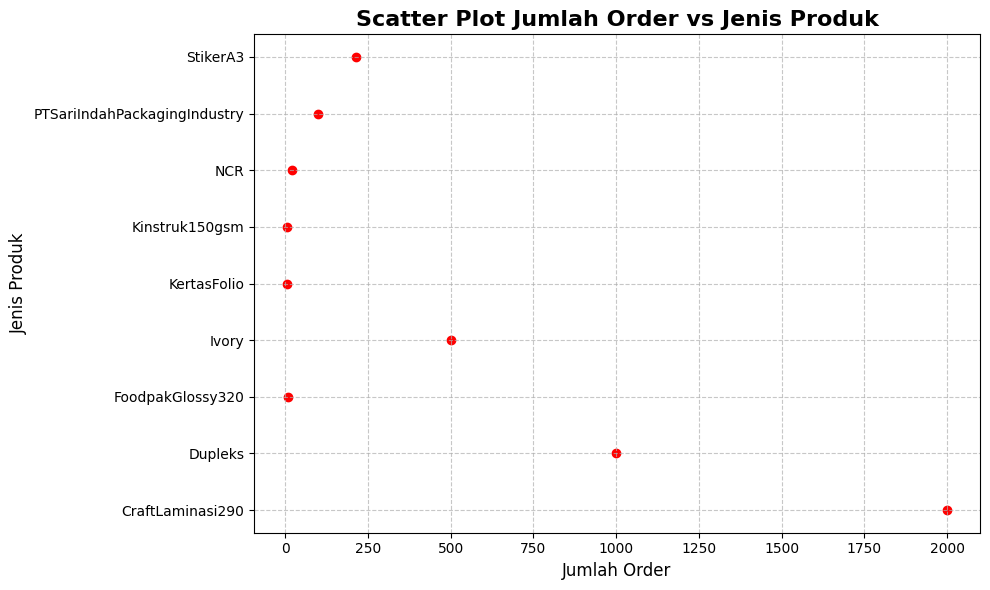

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# ini DataFrame dengan nama produk sebagai string
data = {'Jumlah Order': [500.0, 1000.0, 100.0, 215.0, 8.0, 20.0, 2000.0, 6.0, 5.0],
        'Jenis Produk': ['Ivory', 'Dupleks', 'PTSariIndahPackagingIndustry', 'StikerA3', 
                         'FoodpakGlossy320', 'NCR', 'CraftLaminasi290', 'KertasFolio', 'Kinstruk150gsm']}

df = pd.DataFrame(data)

df['Jenis Produk Num'] = pd.Categorical(df['Jenis Produk']).codes


plt.figure(figsize=(10, 6))
plt.scatter(df['Jumlah Order'], df['Jenis Produk Num'], color='red', marker='o')

# Mengubah labels di sumbu Y agar sesuai dengan nama produk
plt.yticks(df['Jenis Produk Num'], df['Jenis Produk'])

# Menambahkan  label, judul, dan grid
plt.title('Scatter Plot Jumlah Order vs Jenis Produk', fontsize=16, fontweight='bold')
plt.xlabel('Jumlah Order', fontsize=12)
plt.ylabel('Jenis Produk', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# memanggil diagranmnya
plt.tight_layout()
plt.show()


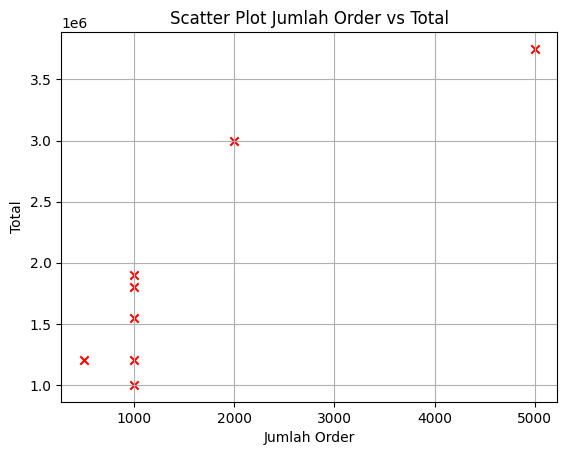

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Data penjualan jumlah order dan Total
data = {'Jumlah Order': [1000.0, 1000.0, 5000.0, 1000.0, 1000.0, 1000.0, 2000.0, 500.0],
        'Total': [1800000, 1900000, 3750000, 1200000, 1550000, 1000000, 3000000, 1200000]}

df = pd.DataFrame(data)

#Scatter plot
plt.scatter(df['Jumlah Order'], df['Total'], color='red', marker='x')

#Label
plt.title('Scatter Plot Jumlah Order vs Total')
plt.xlabel('Jumlah Order')
plt.ylabel('Total')

# Menampilkan diagram
plt.grid(True)
plt.show()
